# Usage (details: policy measures)
Here, we will analyse the relationship of policy measures and parameter values of SIR-derived ODE models. Policy measures are tracked by [Oxford Covid-19 Government Response Tracker (OxCGRT)](https://github.com/OxCGRT/covid-policy-tracker).

## Preparation

In [1]:
# Standard users
# !pip install covsirphy
# Developers (Note: this notebook is in example directory)
import os
os.chdir("../")

In [2]:
from pprint import pprint

In [3]:
import covsirphy as cs
cs.__version__

'2.8.3'

In [4]:
# Standard users and developers
data_loader = cs.DataLoader("input")
# The number of cases (JHU style)
jhu_data = data_loader.jhu(verbose=False)
# Population in each country
population_data = data_loader.population(verbose=False)
# Government Response Tracker (OxCGRT)
oxcgrt_data = data_loader.oxcgrt(verbose=False)
# Description/citation
print(oxcgrt_data.citation)

(Secondary source) Guidotti, E., Ardia, D., (2020), "COVID-19 Data Hub", Journal of Open Source Software 5(51):2376, doi: 10.21105/joss.02376.
We can get Citation list of primary sources with DataLoader(...).covid19dh_citation

## Class for policy measure analysis
We will `PolicyMeasures` class to find relationship of policy measures and parameter values of SIR-derived ODE models.

In [5]:
# Create analyser with tau value 360 [min] (can be changed)
analyser = cs.PolicyMeasures(jhu_data, population_data, oxcgrt_data, tau=360)
# The number of registerd countries
len(analyser.countries)

184

In [6]:
# We can get Scenario instance for detailed scenario analysis
type(analyser.scenario("Japan"))

covsirphy.analysis.scenario.Scenario

## Set phases with S-R trend analysis
We will perform S-R trend analysis to set phases in all countries. Countries which do not have **12th phases** will be un-registered for the next analysis. This number will be adjusted for your analysis.

In [7]:
# Show the number of phases of all countries
analyser.trend()
pprint(analyser.phase_len(), compact=True)

{

4

: 

['Georgia', 'Fiji', 'Myanmar', 'Tanzania']

,
 

5

: 

[

'Hungary'

, 

'Jordan'

, 

'Papua New Guinea'

, 

'Brunei'

, 

'Dominica'

,
     

'Antigua and Barbuda'

, 

'Seychelles'

, 

'Tunisia'

, 

'Grenada'

]

,
 

6

: 

[

'Spain'

, 

'Guyana'

, 

'Gambia'

, 

'Kosovo'

, 

'Libya'

, 

'Lesotho'

, 

'Mauritius'

,
     

'Yemen'

, 

'Belize'

, 

'Burundi'

, 

'Trinidad and Tobago'

, 

'Andorra'

, 

'Uganda'

,
     

'Ireland'

, 

'Kyrgyzstan'

, 

'Jamaica'

, 

'Equatorial Guinea'

,
     

'Czech Republic'

]

,
 

7

: 

[

'Saint Vincent and the Grenadines'

, 

'Cyprus'

, 

'Cambodia'

, 

'Monaco'

,
     

'Mozambique'

, 

'Rwanda'

, 

'Eritrea'

, 

'Colombia'

, 

'Bahamas'

, 

'Botswana'

,
     

'Israel'

, 

'Namibia'

, 

'Netherlands'

, 

'Guinea-Bissau'

, 

'Vietnam'

,
     

'South Sudan'

, 

'Comoros'

, 

'Angola'

, 

'Paraguay'

, 

'New Zealand'

, 

'Slovenia'

,
     

'Australia'

, 

'Nepal'

, 

'Lebanon'

, 

'Central African Republic'

, 

'Iceland'

,
     

'Mongolia'

, 

'Sao Tome and Principe'

, 

'Slovakia'

, 

'Malawi'

, 

'Kazakhstan'

,
     

'Croatia'

, 

'Montenegro'

, 

'Palestine'

, 

'Luxembourg'

, 

'Ethiopia'

,
     

'San Marino'

, 

'Afghanistan'

]

,
 

8

: 

[

'Denmark'

, 

'Suriname'

, 

'Norway'

, 

'Liechtenstein'

, 

'Morocco'

, 

'Costa Rica'

,
     

'Saint Lucia'

, 

'Djibouti'

, 

'Chad'

, 

'Malta'

, 

'Bhutan'

, 

'Maldives'

, 

'Niger'

,
     

'Zimbabwe'

, 

'Madagascar'

, 

'Nicaragua'

, 

'Sudan'

, 

'Philippines'

, 

'Thailand'

,
     

'Syria'

, 

'Argentina'

, 

'Zambia'

, 

'Kenya'

, 

'Barbados'

, 

'Guatemala'

]

,
 

9

: 

[

'Sierra Leone'

, 

'Haiti'

, 

'Oman'

, 

'Congo'

, 

'Uruguay'

, 

'Cameroon'

, 

'Liberia'

,
     

'India'

, 

'South Africa'

, 

'Taiwan'

, 

'Ukraine'

, 

'Japan'

, 

'Qatar'

, 

'Gabon'

,
     

'Venezuela'

, 

'Lithuania'

, 

'Greece'

, 

'Tajikistan'

, 

'Ghana'

, 

'Korea, South'

,
     

'Austria'

, 

'Serbia'

, 

'Bermuda'

, 

'Benin'

, 

'Mauritania'

, 

'Ecuador'

, 

'China'

,
     

'Sri Lanka'

, 

'Indonesia'

]

,
 

10

: 

[

'El Salvador'

, 

'Switzerland'

, 

'Guinea'

, 

'Singapore'

, 

'Pakistan'

,
      

'Uzbekistan'

, 

'Swaziland'

, 

'Azerbaijan'

, 

'Iraq'

, 

'Mali'

, 

'Somalia'

,
      

'Chile'

, 

'Germany'

, 

'Finland'

, 

'Estonia'

, 

'Honduras'

, 

'Poland'

, 

'Romania'

,
      

'Cuba'

, 

'Moldova'

, 

'Albania'

, 

'Senegal'

, 

'Cape Verde'

, 

'Belarus'

]

,
 

11

: 

[

'Canada'

, 

'Algeria'

, 

'Panama'

, 

'Saudi Arabia'

, 

'Togo'

, 

'Egypt'

,
      

'Malaysia'

, 

'Mexico'

, 

'Kuwait'

, 

'Nigeria'

, 

'Bulgaria'

, 

'Belgium'

,
      

'United Arab Emirates'

, 

'Bangladesh'

, 

'Dominican Republic'

, 

'Armenia'

,
      

'Bosnia and Herzegovina'

, 

'Peru'

]

,
 

12

: 

[

'Burkina Faso'

, 

'Bahrain'

, 

'Iran'

, 

'Portugal'

, 

'Bolivia'

, 

'Turkey'

,
      

'France'

, 

'Latvia'

, 

'Italy'

, 

'Brazil'

, 

'United States'

, 

'Macedonia'

]

,
 

13

: 

['Russia']

}

In [8]:
# Set phases with S-R trend analysis
analyser.trend(min_len=12)
# The number of countries
len(analyser.countries)

13

In [9]:
phase_len_dict = analyser.phase_len()
pprint(phase_len_dict, compact=True)

{

12

: 

[

'Burkina Faso'

, 

'Bahrain'

, 

'Iran'

, 

'Portugal'

, 

'Bolivia'

, 

'Turkey'

,
      

'France'

, 

'Latvia'

, 

'Italy'

, 

'Brazil'

, 

'United States'

, 

'Macedonia'

]

,
 

13

: 

['Russia']

}

In [10]:
# Here, only show the countries which have the most phases
countries_show = max(phase_len_dict.items(), key=lambda x: x[0])[1]
# Show summary
analyser.summary(countries=countries_show)

Type      Start        End  Population
Country Phase                                        
Russia  0th    Past  12Feb2020  06May2020   330457362
        1st    Past  07May2020  16May2020   330457362
        2nd    Past  17May2020  27May2020   330457362
        3rd    Past  28May2020  05Jun2020   330457362
        4th    Past  06Jun2020  15Jun2020   330457362
        5th    Past  16Jun2020  27Jun2020   330457362
        6th    Past  28Jun2020  10Jul2020   330457362
        7th    Past  11Jul2020  24Jul2020   330457362
        8th    Past  25Jul2020  08Aug2020   330457362
        9th    Past  09Aug2020  25Aug2020   330457362
        10th   Past  26Aug2020  11Sep2020   330457362
        11th   Past  12Sep2020  25Sep2020   330457362
        12th   Past  26Sep2020  07Oct2020   330457362

## Parameter estimation
we will estimate the parameter values with SIR-derived ODE models in each country.

In [11]:
# Parameter estimation with SIR-F model
analyser.estimate(cs.SIRF)


<SIR-F model: parameter estimation>

Running optimization with 4 CPUs...

	MKD,  4th phase (17Jul2020 - 26Jul2020): finished  423 trials in 0 min 10 sec

	PRT, 10th phase (19Sep2020 - 27Sep2020): finished 1749 trials in 1 min  0 sec

	MKD,  1st phase (08Jun2020 - 24Jun2020): finished 1732 trials in 1 min  0 sec

	BFA,  1st phase (01Apr2020 - 08Apr2020): finished 1782 trials in 1 min  0 sec

	LVA,  6th phase (01Jun2020 - 09Jul2020): finished 1727 trials in 1 min  0 sec

	ITA,  5th phase (01May2020 - 10May2020): finished  574 trials in 0 min 15 sec

	USA,  8th phase (08Aug2020 - 20Aug2020): finished  554 trials in 0 min 15 sec

	BRA, 10th phase (10Sep2020 - 22Sep2020): finished 1662 trials in 1 min  0 sec

	PRT,  4th phase (13Jun2020 - 25Jun2020): finished 1733 trials in 1 min  0 sec

	IRN,  0th phase (26Feb2020 - 29Mar2020): finished 1685 trials in 1 min  0 sec

	FRA,  6th phase (29Jun2020 - 27Jul2020): finished 1695 trials in 1 min  0 sec

	BOL,  9th phase (26Aug2020 - 02Sep2020): finished  213 trials in 0 min  5 sec

	FRA,  0th phase (12Feb2020 - 24Mar2020): finished 1432 trials in 1 min  0 sec

	ITA,  9th phase (25Aug2020 - 11Sep2020): finished 1582 trials in 1 min  0 sec

	BOL,  0th phase (01Apr2020 - 13Jun2020): finished 1481 trials in 1 min  0 sec

	BRA,  1st phase (28May2020 - 14Jun2020): finished 1419 trials in 1 min  0 sec

	IRN,  1st phase (30Mar2020 - 17Apr2020): finished 1428 trials in 1 min  0 sec

	FRA, 11th phase (29Sep2020 - 07Oct2020): finished 1423 trials in 1 min  0 sec

	IRN,  7th phase (17Jul2020 - 31Jul2020): finished  179 trials in 0 min  5 sec

	ITA,  1st phase (21Mar2020 - 28Mar2020): finished 1459 trials in 1 min  0 sec

	BFA,  5th phase (25May2020 - 01Jul2020): finished 1479 trials in 1 min  0 sec

	IRN,  6th phase (02Jul2020 - 16Jul2020): finished  186 trials in 0 min  5 sec

	ITA, 11th phase (26Sep2020 - 07Oct2020): finished 1019 trials in 0 min 35 sec

	BOL,  6th phase (01Aug2020 - 09Aug2020): finished  193 trials in 0 min  5 sec

	PRT,  5th phase (26Jun2020 - 08Jul2020): finished 1549 trials in 1 min  0 sec

	RUS,  0th phase (12Feb2020 - 06May2020): finished 1533 trials in 1 min  0 sec

	FRA,  1st phase (25Mar2020 - 04Apr2020): finished 1546 trials in 1 min  0 sec

	BFA, 10th phase (19Sep2020 - 26Sep2020): finished 1550 trials in 1 min  0 sec

	USA, 11th phase (20Sep2020 - 07Oct2020): finished 1110 trials in 0 min 40 sec

	BOL, 10th phase (03Sep2020 - 20Sep2020): finished 1519 trials in 1 min  0 sec

	BOL,  2nd phase (26Jun2020 - 05Jul2020): finished  347 trials in 0 min 10 sec

	BHR,  6th phase (19Jul2020 - 03Aug2020): finished  327 trials in 0 min 10 sec

	LVA,  0th phase (10Mar2020 - 07Apr2020): finished 1729 trials in 1 min  0 sec

	TUR,  9th phase (23Aug2020 - 06Sep2020): finished  339 trials in 0 min 10 sec

	LVA,  8th phase (06Aug2020 - 28Aug2020): finished 1753 trials in 1 min  0 sec

	LVA,  3rd phase (30Apr2020 - 07May2020): finished 1781 trials in 1 min  0 sec

	BRA,  2nd phase (15Jun2020 - 26Jun2020): finished  492 trials in 0 min 15 sec

	USA,  3rd phase (06Jun2020 - 24Jun2020): finished 1050 trials in 0 min 35 sec

	IRN,  4th phase (01Jun2020 - 16Jun2020): finished 1543 trials in 1 min  0 sec

	BHR,  8th phase (19Aug2020 - 04Sep2020): finished 1567 trials in 1 min  0 sec

	FRA,  7th phase (28Jul2020 - 17Aug2020): finished  524 trials in 0 min 15 sec

	BHR,  2nd phase (02Jun2020 - 13Jun2020): finished 1596 trials in 1 min  0 sec

	LVA, 10th phase (09Sep2020 - 24Sep2020): finished 1740 trials in 1 min  0 sec

	PRT,  2nd phase (15May2020 - 30May2020): finished 1573 trials in 1 min  0 sec

	ITA,  4th phase (19Apr2020 - 30Apr2020): finished  351 trials in 0 min 10 sec

	USA,  4th phase (25Jun2020 - 07Jul2020): finished 1573 trials in 1 min  0 sec

	RUS,  8th phase (25Jul2020 - 08Aug2020): finished 1565 trials in 1 min  0 sec

	ITA,  6th phase (11May2020 - 26May2020): finished  361 trials in 0 min 10 sec

	ITA, 10th phase (12Sep2020 - 25Sep2020): finished  172 trials in 0 min  5 sec

	BHR,  7th phase (04Aug2020 - 18Aug2020): finished 1564 trials in 1 min  0 sec

	MKD,  0th phase (13Mar2020 - 07Jun2020): finished 1509 trials in 1 min  0 sec

	USA,  1st phase (20Apr2020 - 10May2020): finished 1561 trials in 1 min  0 sec

	IRN,  8th phase (01Aug2020 - 17Aug2020): finished 1568 trials in 1 min  0 sec

	FRA,  9th phase (03Sep2020 - 15Sep2020): finished 1037 trials in 0 min 35 sec

	IRN,  9th phase (18Aug2020 - 07Sep2020): finished  187 trials in 0 min  5 sec

	BFA,  9th phase (11Sep2020 - 18Sep2020): finished 1606 trials in 1 min  0 sec

	LVA,  7th phase (10Jul2020 - 05Aug2020): finished 1807 trials in 1 min  0 sec

	TUR,  7th phase (16Jul2020 - 04Aug2020): finished  168 trials in 0 min  5 sec

	TUR,  3rd phase (09May2020 - 22May2020): finished 1587 trials in 1 min  0 sec

	PRT,  3rd phase (31May2020 - 12Jun2020): finished 1596 trials in 1 min  0 sec

	RUS, 10th phase (26Aug2020 - 11Sep2020): finished 1533 trials in 1 min  0 sec

	IRN, 10th phase (08Sep2020 - 22Sep2020): finished 1551 trials in 1 min  0 sec

	BRA,  9th phase (30Aug2020 - 09Sep2020): finished  177 trials in 0 min  5 sec

	BFA,  0th phase (21Mar2020 - 31Mar2020): finished 1485 trials in 1 min  0 sec

	BHR,  4th phase (26Jun2020 - 06Jul2020): finished 1464 trials in 1 min  0 sec

	ITA,  7th phase (27May2020 - 14Jul2020): finished  586 trials in 0 min 20 sec

	MKD, 10th phase (17Sep2020 - 28Sep2020): finished  165 trials in 0 min  5 sec

	RUS,  6th phase (28Jun2020 - 10Jul2020): finished 1448 trials in 1 min  0 sec

	BFA,  8th phase (20Aug2020 - 10Sep2020): finished 1381 trials in 1 min  0 sec

	FRA,  4th phase (05May2020 - 26May2020): finished 1355 trials in 1 min  0 sec

	RUS,  4th phase (06Jun2020 - 15Jun2020): finished 1349 trials in 1 min  0 sec

	IRN,  5th phase (17Jun2020 - 01Jul2020): finished 1328 trials in 1 min  0 sec

	MKD,  6th phase (06Aug2020 - 14Aug2020): finished 1394 trials in 1 min  0 sec

	USA,  7th phase (28Jul2020 - 07Aug2020): finished  327 trials in 0 min 10 sec

	BHR,  5th phase (07Jul2020 - 18Jul2020): finished 1429 trials in 1 min  0 sec

	ITA,  2nd phase (29Mar2020 - 08Apr2020): finished 1461 trials in 1 min  0 sec

	FRA,  8th phase (18Aug2020 - 02Sep2020): finished  845 trials in 0 min 30 sec

	RUS,  7th phase (11Jul2020 - 24Jul2020): finished 1451 trials in 1 min  0 sec

	USA,  5th phase (08Jul2020 - 18Jul2020): finished  329 trials in 0 min 10 sec

	MKD,  3rd phase (08Jul2020 - 16Jul2020): finished  473 trials in 0 min 15 sec

	FRA,  2nd phase (05Apr2020 - 20Apr2020): finished 1477 trials in 1 min  0 sec

	BHR,  1st phase (06May2020 - 01Jun2020): finished 1455 trials in 1 min  0 sec

	RUS,  1st phase (07May2020 - 16May2020): finished 1443 trials in 1 min  0 sec

	MKD,  5th phase (27Jul2020 - 05Aug2020): finished 1175 trials in 0 min 45 sec

	BOL,  8th phase (18Aug2020 - 25Aug2020): finished  572 trials in 0 min 20 sec

	BRA,  8th phase (20Aug2020 - 29Aug2020): finished 1474 trials in 1 min  0 sec

	MKD,  9th phase (04Sep2020 - 16Sep2020): finished  167 trials in 0 min  5 sec

	TUR,  4th phase (23May2020 - 12Jun2020): finished 1438 trials in 1 min  0 sec

	BFA,  6th phase (02Jul2020 - 27Jul2020): finished 1478 trials in 1 min  0 sec

	BFA, 11th phase (27Sep2020 - 07Oct2020): finished 1077 trials in 0 min 40 sec

	BHR, 10th phase (16Sep2020 - 24Sep2020): finished 1475 trials in 1 min  0 sec

	RUS,  5th phase (16Jun2020 - 27Jun2020): finished 1475 trials in 1 min  0 sec

	PRT,  1st phase (29Apr2020 - 14May2020): finished 1464 trials in 1 min  0 sec

	BFA,  3rd phase (20Apr2020 - 04May2020): finished 1458 trials in 1 min  0 sec

	USA,  0th phase (09Feb2020 - 19Apr2020): finished 1402 trials in 1 min  0 sec

	BOL, 11th phase (21Sep2020 - 07Oct2020): finished  168 trials in 0 min  5 sec

	USA,  9th phase (21Aug2020 - 03Sep2020): finished  732 trials in 0 min 25 sec

	BHR,  3rd phase (14Jun2020 - 25Jun2020): finished 1476 trials in 1 min  0 sec

	BHR,  0th phase (06Mar2020 - 05May2020): finished 1382 trials in 1 min  0 sec

	USA,  6th phase (19Jul2020 - 27Jul2020): finished  339 trials in 0 min 10 sec

	IRN, 11th phase (23Sep2020 - 07Oct2020): finished 1443 trials in 1 min  0 sec

	ITA,  0th phase (24Feb2020 - 20Mar2020): finished 1454 trials in 1 min  0 sec

	LVA,  2nd phase (19Apr2020 - 29Apr2020): finished 1446 trials in 1 min  0 sec

	MKD,  7th phase (15Aug2020 - 23Aug2020): finished 1465 trials in 1 min  0 sec

	PRT,  7th phase (25Jul2020 - 18Aug2020): finished 1463 trials in 1 min  0 sec

	RUS,  2nd phase (17May2020 - 27May2020): finished 1422 trials in 1 min  0 sec

	LVA,  1st phase (08Apr2020 - 18Apr2020): finished 1415 trials in 1 min  0 sec

	ITA,  8th phase (15Jul2020 - 24Aug2020): finished 1391 trials in 1 min  0 sec

	BOL,  3rd phase (06Jul2020 - 15Jul2020): finished 1397 trials in 1 min  0 sec

	BOL,  5th phase (24Jul2020 - 31Jul2020): finished  694 trials in 0 min 25 sec

	BRA,  4th phase (09Jul2020 - 21Jul2020): finished 1404 trials in 1 min  0 sec

	PRT,  6th phase (09Jul2020 - 24Jul2020): finished 1380 trials in 1 min  0 sec

	TUR,  1st phase (17Apr2020 - 29Apr2020): finished 1377 trials in 1 min  0 sec

	FRA,  5th phase (27May2020 - 28Jun2020): finished  975 trials in 0 min 40 sec

	BRA,  3rd phase (27Jun2020 - 08Jul2020): finished 1388 trials in 1 min  0 sec

	BFA,  4th phase (05May2020 - 24May2020): finished 1385 trials in 1 min  0 sec

	BHR, 11th phase (25Sep2020 - 07Oct2020): finished  427 trials in 0 min 15 sec

	IRN,  2nd phase (18Apr2020 - 14May2020): finished  414 trials in 0 min 15 sec

	TUR,  5th phase (13Jun2020 - 27Jun2020): finished 1377 trials in 1 min  0 sec

	MKD,  8th phase (24Aug2020 - 03Sep2020): finished 1371 trials in 1 min  0 sec

	TUR,  0th phase (24Mar2020 - 16Apr2020): finished 1433 trials in 1 min  0 sec

	PRT,  0th phase (14Mar2020 - 28Apr2020): finished 1439 trials in 1 min  0 sec

	PRT, 11th phase (28Sep2020 - 07Oct2020): finished 1456 trials in 1 min  0 sec

	USA,  2nd phase (11May2020 - 05Jun2020): finished 1452 trials in 1 min  0 sec

	LVA,  4th phase (08May2020 - 15May2020): finished 1415 trials in 1 min  0 sec

	LVA,  9th phase (29Aug2020 - 08Sep2020): finished 1628 trials in 1 min  0 sec

	BRA,  5th phase (22Jul2020 - 30Jul2020): finished 1380 trials in 1 min  0 sec

	BRA,  0th phase (16Mar2020 - 27May2020): finished 1322 trials in 1 min  0 sec

	BOL,  4th phase (16Jul2020 - 23Jul2020): finished  324 trials in 0 min 10 sec

	USA, 10th phase (04Sep2020 - 19Sep2020): finished  914 trials in 0 min 35 sec

	PRT,  8th phase (19Aug2020 - 07Sep2020): finished 1406 trials in 1 min  0 sec

	FRA,  3rd phase (21Apr2020 - 04May2020): finished 1400 trials in 1 min  0 sec

	FRA, 10th phase (16Sep2020 - 28Sep2020): finished 1429 trials in 1 min  0 sec

	PRT,  9th phase (08Sep2020 - 18Sep2020): finished 1388 trials in 1 min  0 sec

	BHR,  9th phase (05Sep2020 - 15Sep2020): finished  279 trials in 0 min 10 sec

	LVA,  5th phase (16May2020 - 31May2020): finished 1580 trials in 1 min  0 sec

	BFA,  7th phase (28Jul2020 - 19Aug2020): finished  567 trials in 0 min 20 sec

	BRA,  7th phase (11Aug2020 - 19Aug2020): finished 1375 trials in 1 min  0 sec

	RUS,  9th phase (09Aug2020 - 25Aug2020): finished 1319 trials in 1 min  0 sec

	TUR,  6th phase (28Jun2020 - 15Jul2020): finished  552 trials in 0 min 20 sec

	BFA,  2nd phase (09Apr2020 - 19Apr2020): finished 1330 trials in 1 min  0 sec

	RUS,  3rd phase (28May2020 - 05Jun2020): finished 1329 trials in 1 min  0 sec

	BOL,  7th phase (10Aug2020 - 17Aug2020): finished  347 trials in 0 min 10 sec

	ITA,  3rd phase (09Apr2020 - 18Apr2020): finished  344 trials in 0 min 10 sec

	IRN,  3rd phase (15May2020 - 31May2020): finished  196 trials in 0 min  5 sec

	TUR, 10th phase (07Sep2020 - 20Sep2020): finished  190 trials in 0 min  5 sec

	TUR,  8th phase (05Aug2020 - 22Aug2020): finished  367 trials in 0 min 10 sec

	TUR,  2nd phase (30Apr2020 - 08May2020): finished 1150 trials in 0 min 35 sec

	BRA,  6th phase (31Jul2020 - 10Aug2020): finished 1001 trials in 0 min 30 sec

Completed optimization. Total: 29 min 25 sec

In [12]:
# Show summary
analyser.summary(countries=countries_show)

Type      Start        End  Population    ODE    Rt  \
Country Phase                                                        
Russia  0th    Past  12Feb2020  06May2020   330457362  SIR-F  0.02   
        1st    Past  07May2020  16May2020   330457362  SIR-F  2.51   
        2nd    Past  17May2020  27May2020   330457362  SIR-F  1.15   
        3rd    Past  28May2020  05Jun2020   330457362  SIR-F   1.1   
        4th    Past  06Jun2020  15Jun2020   330457362  SIR-F  1.28   
        5th    Past  16Jun2020  27Jun2020   330457362  SIR-F   0.8   
        6th    Past  28Jun2020  10Jul2020   330457362  SIR-F  0.95   
        7th    Past  11Jul2020  24Jul2020   330457362  SIR-F  0.87   
        8th    Past  25Jul2020  08Aug2020   330457362  SIR-F  0.77   
        9th    Past  09Aug2020  25Aug2020   330457362  SIR-F  0.88   
        10th   Past  26Aug2020  11Sep2020   330457362  SIR-F  0.89   
        11th   Past  12Sep2020  25Sep2020   330457362      -     -   
        12th   Past  26Sep2020  07Oct2020   330457362      -     -   

                     theta        kappa         rho       sigma  tau  \
Country Phase                                                          
Russia  0th       0.602763     0.544883   0.0340813  0.00229851  360   
        1st    0.000729031  0.000119717   0.0129583  0.00504465  360   
        2nd    0.000245149  0.000113228  0.00683065  0.00582833  360   
        3rd    0.000596242  0.000113634   0.0051706  0.00457356  360   
        4th    0.000786892  7.74638e-05  0.00439562  0.00335729  360   
        5th    0.000390937  7.58064e-05  0.00341093  0.00418775  360   
        6th      0.0219693   9.9669e-06   0.0024934  0.00255958  360   
        7th      0.0176565  1.87992e-05  0.00209159  0.00234437  360   
        8th      0.0191266  6.10111e-06  0.00162793  0.00207102  360   
        9th     0.00689034  4.95955e-05  0.00131997  0.00143376  360   
        10th   0.000891504  2.12576e-05  0.00124912  0.00138666  360   
        11th             -            -           -           -    -   
        12th             -            -           -           -    -   

              1/gamma [day] alpha1 [-] 1/alpha2 [day] 1/beta [day]      RMSLE  \
Country Phase                                                                   
Russia  0th             108      0.603              0            7    18.9667   
        1st              49      0.001           2088           19  0.0742295   
        2nd              42          0           2207           36   0.108726   
        3rd              54      0.001           2200           48  0.0627844   
        4th              74      0.001           3227           56  0.0548609   
        5th              59          0           3297           73   0.081878   
        6th              97      0.022          25083          100  0.0595978   
        7th             106      0.018          13298          119  0.0606394   
        8th             120      0.019          40976          153   0.058755   
        9th             174      0.007           5040          189  0.0732087   
        10th            180      0.001          11760          200  0.0481596   
        11th              -          -              -            -          -   
        12th              -          -              -            -          -   

              Trials       Runtime  
Country Phase                       
Russia  0th     1533  1 min  0 sec  
        1st     1443  1 min  0 sec  
        2nd     1422  1 min  0 sec  
        3rd     1329  1 min  0 sec  
        4th     1349  1 min  0 sec  
        5th     1475  1 min  0 sec  
        6th     1448  1 min  0 sec  
        7th     1451  1 min  0 sec  
        8th     1565  1 min  0 sec  
        9th     1319  1 min  0 sec  
        10th    1533  1 min  0 sec  
        11th       -             -  
        12th       -             -

## Compare the history of parameters
Here, compare the history of parameter values if countries.

In [13]:
# All parameter/day parameter/Rt/OxCGRT
analyser.track().head()

,Date,Country,theta,kappa,rho,sigma,alpha1 [-],1/alpha2 [day],1/beta [day],1/gamma [day],...,Cancel_events,Gatherings_restrictions,Transport_closing,Stay_home_restrictions,Internal_movement_restrictions,International_movement_restrictions,Information_campaigns,Testing_policy,Contact_tracing,Stringency_index
0,2020-03-21,Burkina Faso,0.0490537,0.00077981,0.0418,0.00320672,0.049,320,5,77,...,2,1,0,2,2,4,2,1,2,73.15
1,2020-03-22,Burkina Faso,0.0490537,0.00077981,0.0418,0.00320672,0.049,320,5,77,...,2,1,0,2,2,4,2,1,2,73.15
2,2020-03-23,Burkina Faso,0.0490537,0.00077981,0.0418,0.00320672,0.049,320,5,77,...,2,1,2,2,2,4,2,1,2,84.26
3,2020-03-24,Burkina Faso,0.0490537,0.00077981,0.0418,0.00320672,0.049,320,5,77,...,2,1,2,2,2,4,2,1,2,84.26
4,2020-03-25,Burkina Faso,0.0490537,0.00077981,0.0418,0.00320672,0.049,320,5,77,...,2,1,2,2,2,4,2,1,2,84.26


### $Rt$: Reprodcution number $\mathrm{[-]}$

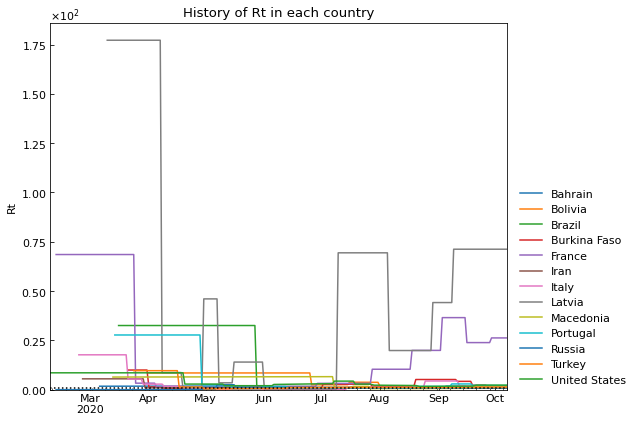

Country,Bahrain,Bolivia,Brazil,Burkina Faso,France,Iran,Italy,Latvia,Macedonia,Portugal,Russia,Turkey,United States
Date,,,,,,,,,,,,,
2020-10-03,0.8,0.74,0.98,1.11,26.25,1.53,1.86,71.23,1.34,2.11,0.89,1.33,2.32
2020-10-04,0.8,0.74,0.98,1.11,26.25,1.53,1.86,71.23,1.34,2.11,0.89,1.33,2.32
2020-10-05,0.8,0.74,0.98,1.11,26.25,1.53,1.86,71.23,1.34,2.11,0.89,1.33,2.32
2020-10-06,0.8,0.74,0.98,1.11,26.25,1.53,1.86,71.23,1.34,2.11,0.89,1.33,2.32
2020-10-07,0.8,0.74,0.98,1.11,26.25,1.53,1.86,71.23,1.34,2.11,0.89,1.33,2.32


In [14]:
analyser.param_history("Rt", roll_window=None).tail()

### $\rho$: Effective contact rate $\mathrm{[-]}$

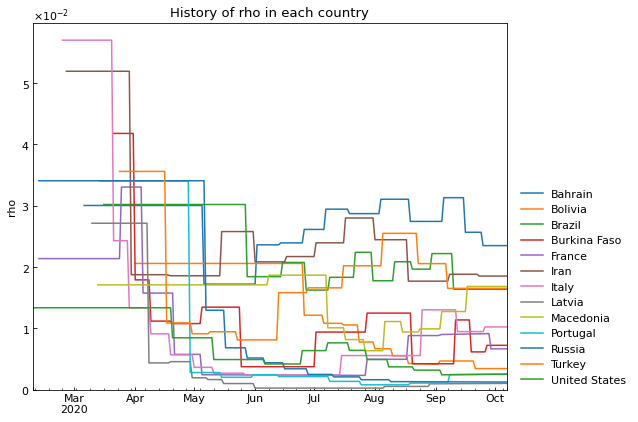

Country,Bahrain,Bolivia,Brazil,Burkina Faso,France,Iran,Italy,Latvia,Macedonia,Portugal,Russia,Turkey,United States
Date,,,,,,,,,,,,,
2020-10-03,0.0235,0.003447,0.016389,0.007238,0.006665,0.018536,0.010238,0.001032,0.016837,0.002511,0.001249,0.016527,0.002551
2020-10-04,0.0235,0.003447,0.016389,0.007238,0.006665,0.018536,0.010238,0.001032,0.016837,0.002511,0.001249,0.016527,0.002551
2020-10-05,0.0235,0.003447,0.016389,0.007238,0.006665,0.018536,0.010238,0.001032,0.016837,0.002511,0.001249,0.016527,0.002551
2020-10-06,0.0235,0.003447,0.016389,0.007238,0.006665,0.018536,0.010238,0.001032,0.016837,0.002511,0.001249,0.016527,0.002551
2020-10-07,0.0235,0.003447,0.016389,0.007238,0.006665,0.018536,0.010238,0.001032,0.016837,0.002511,0.001249,0.016527,0.002551


In [15]:
analyser.param_history("rho", roll_window=None).tail()

### $\sigma$: Recovery rate $\mathrm{[-]}$

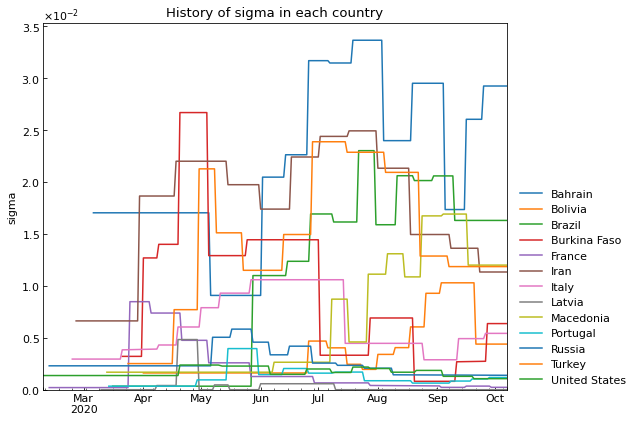

Country,Bahrain,Bolivia,Brazil,Burkina Faso,France,Iran,Italy,Latvia,Macedonia,Portugal,Russia,Turkey,United States
Date,,,,,,,,,,,,,
2020-10-03,0.02922,0.004388,0.016287,0.006361,0.00023,0.011325,0.005419,0.0,0.011988,0.001174,0.001387,0.011844,0.001061
2020-10-04,0.02922,0.004388,0.016287,0.006361,0.00023,0.011325,0.005419,0.0,0.011988,0.001174,0.001387,0.011844,0.001061
2020-10-05,0.02922,0.004388,0.016287,0.006361,0.00023,0.011325,0.005419,0.0,0.011988,0.001174,0.001387,0.011844,0.001061
2020-10-06,0.02922,0.004388,0.016287,0.006361,0.00023,0.011325,0.005419,0.0,0.011988,0.001174,0.001387,0.011844,0.001061
2020-10-07,0.02922,0.004388,0.016287,0.006361,0.00023,0.011325,0.005419,0.0,0.011988,0.001174,0.001387,0.011844,0.001061


In [16]:
analyser.param_history("sigma", roll_window=None).tail()

### $\kappa$: Mortality rate of infected cases $\mathrm{[-]}$

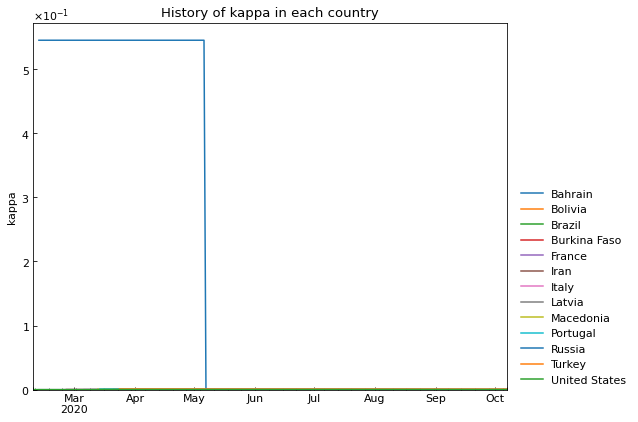

Country,Bahrain,Bolivia,Brazil,Burkina Faso,France,Iran,Italy,Latvia,Macedonia,Portugal,Russia,Turkey,United States
Date,,,,,,,,,,,,,
2020-10-03,0.000098,0.000079,0.000041,0.000136,0.000024,0.000382,0.000084,0.000014,0.000463,0.00001,0.000021,0.000516,0.000041
2020-10-04,0.000098,0.000079,0.000041,0.000136,0.000024,0.000382,0.000084,0.000014,0.000463,0.00001,0.000021,0.000516,0.000041
2020-10-05,0.000098,0.000079,0.000041,0.000136,0.000024,0.000382,0.000084,0.000014,0.000463,0.00001,0.000021,0.000516,0.000041
2020-10-06,0.000098,0.000079,0.000041,0.000136,0.000024,0.000382,0.000084,0.000014,0.000463,0.00001,0.000021,0.000516,0.000041
2020-10-07,0.000098,0.000079,0.000041,0.000136,0.000024,0.000382,0.000084,0.000014,0.000463,0.00001,0.000021,0.000516,0.000041


In [17]:
analyser.param_history("kappa", roll_window=None).tail()

### $\theta$: Mortality rate of S$^\ast$ cases $\mathrm{[-]}$

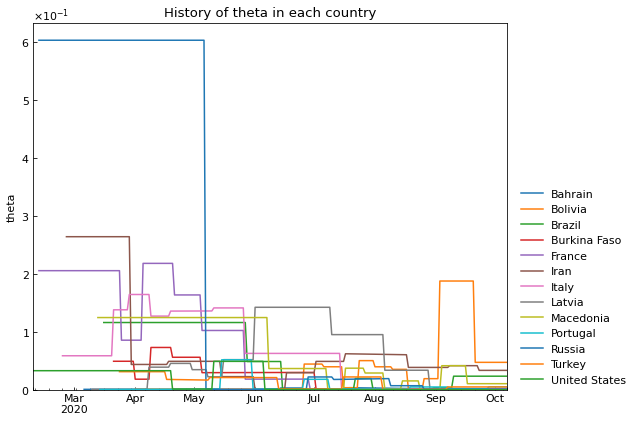

Country,Bahrain,Bolivia,Brazil,Burkina Faso,France,Iran,Italy,Latvia,Macedonia,Portugal,Russia,Turkey,United States
Date,,,,,,,,,,,,,
2020-10-03,0.000434,0.047186,0.023302,0.001302,0.001091,0.033343,0.000703,0.000098,0.01037,0.004954,0.000892,0.004787,0.000019
2020-10-04,0.000434,0.047186,0.023302,0.001302,0.001091,0.033343,0.000703,0.000098,0.01037,0.004954,0.000892,0.004787,0.000019
2020-10-05,0.000434,0.047186,0.023302,0.001302,0.001091,0.033343,0.000703,0.000098,0.01037,0.004954,0.000892,0.004787,0.000019
2020-10-06,0.000434,0.047186,0.023302,0.001302,0.001091,0.033343,0.000703,0.000098,0.01037,0.004954,0.000892,0.004787,0.000019
2020-10-07,0.000434,0.047186,0.023302,0.001302,0.001091,0.033343,0.000703,0.000098,0.01037,0.004954,0.000892,0.004787,0.000019


In [18]:
analyser.param_history("theta", roll_window=None).tail()

## (Experimental): Relationship of OxCGRT index and parameter values
Government responses will impact on parameter values of ODE models about 14 days later. Here, we will investigate on the relationship of [stringency index (from OxCGRT)](https://github.com/OxCGRT/covid-policy-tracker/blob/master/documentation/index_methodology.md) and reproduction number/model parameters.


In [19]:
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd

In [20]:
df = analyser.track()
param_cols = ["Rt", *cs.SIRF.PARAMETERS]
oxcgrt_cols = oxcgrt_data.OXCGRT_VARS[:]
cols = param_cols + oxcgrt_cols
delay = 14

for col in param_cols:
    df[col] = pd.to_numeric(df[col], errors="coerce")
    df[col] = df.groupby("Country")[col].shift(0 - delay)

df = df.dropna(how="any")
df = df.loc[:, ["Date", "Country", *cols]]
track_df = df.copy()
track_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73684 entries, 0 to 73851
Data columns (total 19 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   Date                                 73684 non-null  datetime64[ns]
 1   Country                              73684 non-null  object        
 2   Rt                                   73684 non-null  float64       
 3   theta                                73684 non-null  float64       
 4   kappa                                73684 non-null  float64       
 5   rho                                  73684 non-null  float64       
 6   sigma                                73684 non-null  float64       
 7   School_closing                       73684 non-null  int64         
 8   Workplace_closing                    73684 non-null  int64         
 9   Cancel_events                        73684 non-null  int64         
 10  Gatherings

In [21]:
# Correlation
df = track_df.copy()
df.corr().style.background_gradient(axis=None)

,Rt,theta,kappa,rho,sigma,School_closing,Workplace_closing,Cancel_events,Gatherings_restrictions,Transport_closing,Stay_home_restrictions,Internal_movement_restrictions,International_movement_restrictions,Information_campaigns,Testing_policy,Contact_tracing,Stringency_index
Rt,1.000000,-0.178796,-0.165439,0.197789,-0.328369,-0.266884,-0.209481,-0.260647,-0.225462,-0.260093,-0.244760,-0.394272,-0.221172,-0.122239,-0.263548,-0.188933,-0.268740
theta,-0.178796,1.000000,0.960272,0.669663,0.044763,-0.128085,-0.118721,-0.178611,-0.089406,-0.103799,0.243954,0.138513,0.126033,-0.341266,-0.239868,-0.004679,-0.038411
kappa,-0.165439,0.960272,1.000000,0.698999,0.038029,-0.131233,-0.126769,-0.111636,-0.069823,-0.074192,0.258672,0.191682,0.210298,-0.340877,-0.189112,-0.016478,-0.027635
rho,0.197789,0.669663,0.698999,1.000000,0.143516,-0.097524,-0.152360,-0.059308,-0.009590,-0.020647,0.205297,0.207440,0.126271,-0.430105,-0.425750,-0.281694,-0.016446
sigma,-0.328369,0.044763,0.038029,0.143516,1.000000,0.274672,0.083609,0.305995,0.122562,0.189927,0.222914,0.294506,0.126564,0.015196,-0.046738,0.077765,0.249751
School_closing,-0.266884,-0.128085,-0.131233,-0.097524,0.274672,1.000000,0.716619,0.709476,0.601929,0.537946,0.603336,0.517930,0.450222,0.634004,0.408844,0.227508,0.809084
Workplace_closing,-0.209481,-0.118721,-0.126769,-0.152360,0.083609,0.716619,1.000000,0.614890,0.612908,0.517898,0.605567,0.418351,0.431506,0.784678,0.451858,0.362875,0.819455
Cancel_events,-0.260647,-0.178611,-0.111636,-0.059308,0.305995,0.709476,0.614890,1.000000,0.679007,0.580105,0.511429,0.562463,0.672828,0.649732,0.324728,0.262027,0.817749
Gatherings_restrictions,-0.225462,-0.089406,-0.069823,-0.009590,0.122562,0.601929,0.612908,0.679007,1.000000,0.779078,0.639735,0.679287,0.599844,0.560642,0.257362,0.093756,0.859896
Transport_closing,-0.260093,-0.103799,-0.074192,-0.020647,0.189927,0.537946,0.517898,0.580105,0.779078,1.000000,0.578208,0.618893,0.590278,0.338054,0.037340,-0.159041,0.761477


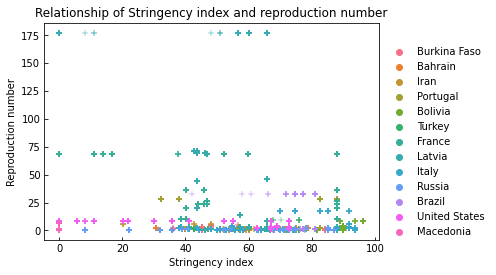

In [22]:
# Scatter plot of Stringency index and Rt
df = track_df.copy()
sns.scatterplot(data=df, x="Stringency_index", y="Rt", hue="Country", legend="brief", marker="+")
bbox_to_anchor=(1.02, 0)
bbox_loc="lower left"
plt.legend(bbox_to_anchor=bbox_to_anchor, loc=bbox_loc, borderaxespad=0)
plt.title("Relationship of Stringency index and reproduction number")
plt.ylabel("Reproduction number")
plt.xlabel("Stringency index")
plt.show()